In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


mouse_metadata.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [32]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [33]:
 len(study_results)

1893

In [34]:
# Combine the data into a single dataset
new_subset = study_results.merge(mouse_metadata, how='left', on='Mouse ID')

In [35]:
clean_data = new_subset.drop_duplicates(subset=['Mouse ID','Timepoint'],keep=False)

In [36]:
len(clean_data)

1883

In [37]:
# Display the data table for preview
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [38]:
# Checking the number of mice.
mice_count = len(pd.unique(clean_data["Mouse ID"]))
mice_count

249

In [39]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 

dropped_values = new_subset.loc[(new_subset.duplicated(subset=['Mouse ID','Timepoint'],keep=False)) == True ,:]
dropped_values

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [40]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [41]:
## Summary Statistics
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

grouped_df = clean_data.groupby("Drug Regimen")

In [42]:
a = grouped_df['Tumor Volume (mm3)'].mean()
a

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.458254
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [43]:
b = grouped_df['Tumor Volume (mm3)'].median()

In [44]:
c =grouped_df['Tumor Volume (mm3)'].var()

In [45]:
d = grouped_df['Tumor Volume (mm3)'].std()

In [46]:
e = grouped_df['Tumor Volume (mm3)'].sem()

In [47]:
# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({"Mean": a, "Median": b, "Variance": c, "Std Dev": d, "SEM": e})
summary_df

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [48]:
# Using the aggregation method, produce the same summary statistics in a single line
aggregation_method = grouped_df['Tumor Volume (mm3)'].agg(['mean', 'median','var','std','sem'])
aggregation_method

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [49]:
value_count = grouped_df['Tumor Volume (mm3)'].count()
value_count

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     151
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Tumor Volume (mm3), dtype: int64

## Bar and Pie Charts

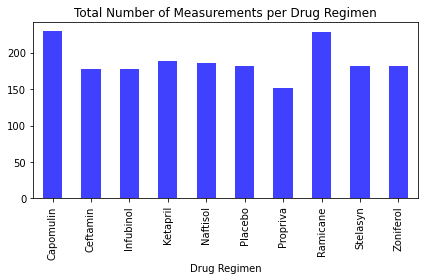

In [50]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
value_count.plot(kind="bar", color='b',alpha=0.75, align="center")
plt.title("Total Number of Measurements per Drug Regimen")
plt.tight_layout()
plt.show()

In [51]:
aaa = value_count.reset_index()
aaa

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,151
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


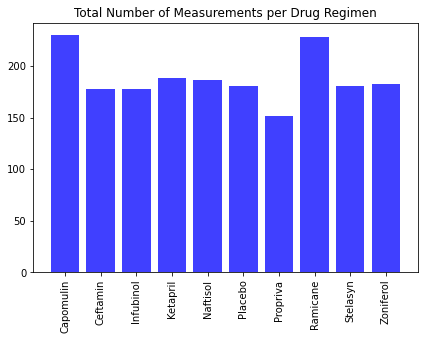

In [53]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.bar(aaa["Drug Regimen"], aaa["Tumor Volume (mm3)"], color='b', alpha=0.75, align="center")
plt.tight_layout()
plt.title("Total Number of Measurements per Drug Regimen")
plt.xticks(rotation = 90) 
plt.show()

In [54]:
grouped_sex_df = clean_data.groupby("Sex")
sex_count = grouped_sex_df['Tumor Volume (mm3)'].count()
sex_count

Sex
Female    925
Male      958
Name: Tumor Volume (mm3), dtype: int64

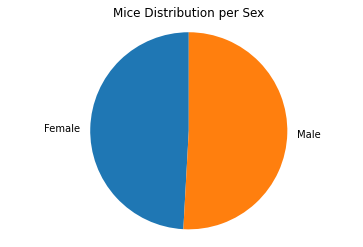

In [58]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_pie = sex_count.plot(kind="pie", title=("Mice Distribution per Sex"), startangle=90) 
sex_pie.set_ylabel(" ")
plt.axis("equal")
plt.show()

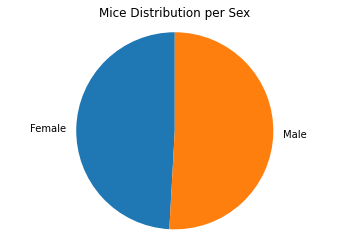

In [65]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.title("Mice Distribution per Sex")
plt.pie(sex_count, labels =["Female", "Male"] , startangle=90)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [68]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
sorted_df = clean_data.sort_values("Timepoint", ascending=False)
max_timepoints = sorted_df.drop_duplicates(subset=['Mouse ID'],keep="first")
max_timepoints


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1892,b879,45,72.555239,2,Stelasyn,Female,4,26
1795,s508,45,30.276232,0,Ramicane,Male,1,17
1797,y793,45,31.896238,2,Capomulin,Male,17,17
1798,c766,45,69.823146,4,Placebo,Female,13,26
1799,z578,45,30.638696,0,Ramicane,Male,11,16
...,...,...,...,...,...,...,...,...
194,b447,0,45.000000,0,Ceftamin,Male,2,30
222,t573,0,45.000000,0,Ceftamin,Female,15,27
155,l872,0,45.000000,0,Placebo,Male,19,30
135,d133,0,45.000000,0,Zoniferol,Male,5,30


In [62]:
timepoint_df = clean_data.loc[[ (clean_data['Timepoint'].max()) for mouse in y]]



#Merge this group df with the original dataframe to get the tumor volume at the last timepoint


NameError: name 'y' is not defined

In [71]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
